Importing the necessary libraries from the custom functions.py file

In [1]:
from functions import *

Initializing the dataset

In [2]:
df = pd.read_csv("Heart Disease.csv")
df

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  HeartDisease  
0          80.0     77.0             0  
1          95.0     76.0             0  
2          75.0     70.0             0  
3          65.0    103.0             1  
4          85.0     85.0             0  
...         ...      ...           ...  
4233       66.0     86.0             1  
4234       65.0     68.0             0  
4235       84.0     86.0             0  
4236       86.0      NaN             0  
4237       80.0    107.0             0  

[4238 rows x 16 columns]

In [3]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
HeartDisease         0
dtype: int64

In [4]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
HeartDisease       0
dtype: int64

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
X.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0

In [7]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [8]:
y.value_counts()

0    3594
1     644
Name: HeartDisease, dtype: int64

In [9]:
X_train, x, y_train, y_temp = train_test_split(X,y,test_size = 0.3, random_state= 42)
X_test, X_val, y_test, y_val = train_test_split(x, y_temp, test_size = 0.5, random_state = 42)

Standardizing the data as there is huge variation between the ranges of each feature (scratch implementation)

In [10]:
X_train_scaled, X_test_scaled, X_val_scaled = standardize(X_train,X_test,X_val) 
X_train_scaled.head()

male       age  education  currentSmoker  cigsPerDay    BPMeds  \
2010 -0.852752 -0.888585  -0.959109       0.983780   -0.017458 -0.175494   
3340 -0.852752  1.694360  -0.959109      -1.016145   -0.775144  5.784590   
3591 -0.852752 -1.240805   0.038606      -1.016145   -0.775144 -0.175494   
2742  1.172278 -1.123398  -0.959109       0.983780    0.908603 -0.175494   
4034 -0.852752 -1.123398   0.038606       0.983780    0.908603 -0.175494   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
2010        -0.082381      1.475892 -0.162138  0.819665  0.113168  0.585221   
3340        -0.082381      1.475892 -0.162138  1.064525  1.247060  0.332114   
3591        -0.082381     -0.677328 -0.162138 -0.716275 -1.292859 -0.764683   
2742        -0.082381     -0.677328 -0.162138 -0.204295 -0.068255 -0.258469   
4034        -0.082381     -0.677328 -0.162138 -0.538195 -0.113611 -0.258469   

           BMI  heartRate   glucose  
2010 -0.887353  -0.505143 -0.002243  
3340  0.999829  -0.925578  0.220281  
3591 -1.285166  -0.673317 -0.002243  
2742  0.223610  -1.009665 -0.354461  
4034 -1.423430   1.681121 -0.266039

# Part a 
## Logistic Regression from Scratch 

In [11]:
class MyLogisticRegression:
    def __init__(self, lr=0.01, epochs=100, batch_size=None, pred_type=None, early_stopping=False, patience=5, l1=0, l2=0):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.pred_type = pred_type
        self.early_stopping = early_stopping
        self.patience = patience
        self.l1 = l1 
        self.l2 = l2  
        self.train_loss_list = []
        self.val_loss_list = []
        self.train_acc = []
        self.val_acc = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def CrossEntropyLoss(self, y_true, y_pred):
        m = len(y_true)
        epsilon = 1e-10  # Small value to prevent log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Regularization terms
        l1_penalty = self.l1 * np.sum(np.abs(self.weights)) if self.l1 > 0 else 0
        l2_penalty = self.l2 * np.sum(self.weights**2) if self.l2 > 0 else 0
        
        loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
        return loss + l1_penalty + l2_penalty
    
    def fit(self, X, y, X_val, y_val):
        m, n = X.shape
        self.weights = np.random.randn(n) * 0.01
        self.bias = 0
        
        best_val_loss = float('inf')
        patience_counter = 0
        
        for i in range(self.epochs):
            if self.batch_size is None:
                # Full batch gradient descent
                batch_X, batch_y = X, y
            elif self.batch_size == 1:
                # Stochastic gradient descent
                idx = np.random.randint(m)
                batch_X = X.iloc[[idx]] if isinstance(X, pd.DataFrame) else X[idx:idx+1]
                batch_y = y.iloc[[idx]] if isinstance(y, pd.Series) else y[idx:idx+1]
            else:
                # Mini-batch gradient descent
                idx = np.random.randint(m, size=self.batch_size)
                batch_X = X.iloc[idx] if isinstance(X, pd.DataFrame) else X[idx]
                batch_y = y.iloc[idx] if isinstance(y, pd.Series) else y[idx]

            model = np.dot(batch_X, self.weights) + self.bias
            y_pred = self.sigmoid(model)
            
            error = y_pred - batch_y
            dw = (1/len(batch_y)) * np.dot(batch_X.T, error)
            db = (1/len(batch_y)) * np.sum(error)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            train_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            val_pred = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            
            train_loss = self.CrossEntropyLoss(y, train_pred)
            val_loss = self.CrossEntropyLoss(y_val, val_pred)
            
            train_accuracy = np.mean((train_pred > 0.5) == y)
            val_accuracy = np.mean((val_pred > 0.5) == y_val)
            
            self.train_loss_list.append(train_loss)
            self.val_loss_list.append(val_loss)
            self.train_acc.append(train_accuracy)
            self.val_acc.append(val_accuracy)
            
            if i % 10 == 0 and self.pred_type == None:  # Print every 10 epochs 
                print(f'Epoch: {i}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
            elif i % 10 == 0 and self.pred_type == "test":
                print(f'Epoch: {i}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {val_loss:.4f}, Test Accuracy: {val_accuracy:.4f}')
            
            # Early stopping check
            if self.early_stopping:
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience_counter = 0  # Reset counter if improvement
                else:
                    patience_counter += 1
                    if patience_counter >= self.patience:
                        print(f"Early stopping at epoch {i}")
                        break
        
        # After early stopping
        early_stop_epoch = i  # Store the epoch where early stopping occurred

        # Trim lists for plotting
        self.train_loss_list = self.train_loss_list[:early_stop_epoch]
        self.val_loss_list = self.val_loss_list[:early_stop_epoch]
        self.train_acc = self.train_acc[:early_stop_epoch]
        self.val_acc = self.val_acc[:early_stop_epoch]

        
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(model) > 0.5

In [12]:
EPOCHS = 100
LR = 0.01

model = MyLogisticRegression(lr = LR, epochs = EPOCHS)
model.fit(X_train_scaled, y_train, X_val_scaled, y_val)

Epoch: 0, Train Loss: 0.6941, Train Accuracy: 0.4606, Val Loss: 0.6934, Val Accuracy: 0.4827
Epoch: 10, Train Loss: 0.6796, Train Accuracy: 0.7596, Val Loss: 0.6780, Val Accuracy: 0.8003
Epoch: 20, Train Loss: 0.6660, Train Accuracy: 0.8250, Val Loss: 0.6637, Val Accuracy: 0.8381
Epoch: 30, Train Loss: 0.6533, Train Accuracy: 0.8365, Val Loss: 0.6503, Val Accuracy: 0.8396
Epoch: 40, Train Loss: 0.6414, Train Accuracy: 0.8372, Val Loss: 0.6378, Val Accuracy: 0.8443
Epoch: 50, Train Loss: 0.6302, Train Accuracy: 0.8348, Val Loss: 0.6260, Val Accuracy: 0.8428
Epoch: 60, Train Loss: 0.6196, Train Accuracy: 0.8345, Val Loss: 0.6150, Val Accuracy: 0.8459
Epoch: 70, Train Loss: 0.6097, Train Accuracy: 0.8361, Val Loss: 0.6046, Val Accuracy: 0.8443
Epoch: 80, Train Loss: 0.6003, Train Accuracy: 0.8358, Val Loss: 0.5949, Val Accuracy: 0.8443
Epoch: 90, Train Loss: 0.5914, Train Accuracy: 0.8361, Val Loss: 0.5857, Val Accuracy: 0.8443


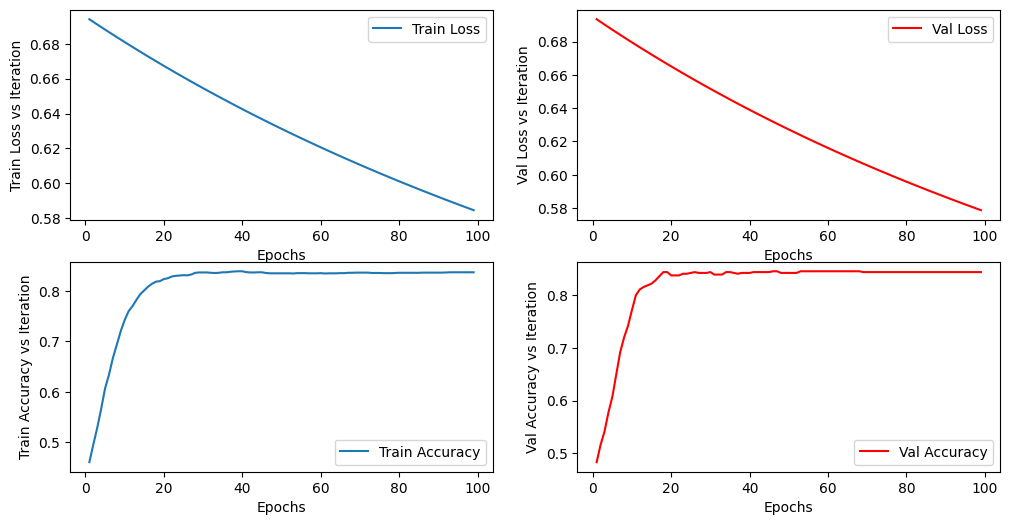

In [13]:
plt.figure(figsize=(12,6))

epochs = range(1,EPOCHS)

plt.subplot(2,2,1)
plt.plot(epochs, model.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



# COMBINATION OF BOTH

# plt.subplot(3,2,5)
# plt.plot(epochs, model.train_loss_list, label = 'Train Loss')
# plt.plot(epochs, model.val_loss_list, label = 'Val Loss', color = 'red')
# plt.xlabel('Epochs')
# plt.ylabel('Train Loss vs Val Loss')
# plt.legend()

# plt.subplot(3,2,6)
# plt.plot(epochs, model.train_acc, label = 'Train Accuracy')
# plt.plot(epochs, model.val_acc, label = 'Val Accuracy', color = 'red')
# plt.xlabel('Epochs')
# plt.ylabel('Train Accuracy vs Val Accuracy')
# plt.legend()

Metrics of dataset with no-scaling (standardization)

In [14]:
y_val_pred = model.predict(X_val_scaled)
# print(y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.sigmoid(np.dot(X_val_scaled, model.weights) + model.bias))

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Confusion Matrix:
[[522  16]
 [ 83  15]]
Precision: 0.4838709677419355
Recall: 0.15306122448979592
F1 Score: 0.2325581395348837
ROC-AUC Score: 0.7340300432440635


Normalizing the dataset using the min_max_scaler (scratch implementation)

In [15]:
X_train_mm, X_test_mm, X_val_mm = min_max_scaler(X_train_scaled,X_test_scaled,X_val_scaled) 
X_train_mm.head()

male       age  education  currentSmoker  cigsPerDay  BPMeds  \
2010   0.0  0.263158   0.000000            1.0    0.150000     0.0   
3340   0.0  0.842105   0.000000            0.0    0.000000     1.0   
3591   0.0  0.184211   0.333333            0.0    0.000000     0.0   
2742   1.0  0.210526   0.000000            1.0    0.333333     0.0   
4034   0.0  0.210526   0.333333            1.0    0.333333     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
2010              0.0           1.0       0.0  0.283531  0.243499  0.456522   
3340              0.0           1.0       0.0  0.302207  0.361702  0.423913   
3591              0.0           0.0       0.0  0.166384  0.096927  0.282609   
2742              0.0           0.0       0.0  0.205433  0.224586  0.347826   
4034              0.0           0.0       0.0  0.179966  0.219858  0.347826   

           BMI  heartRate   glucose  
2010  0.161173   0.263158  0.118550  
3340  0.349733   0.210526  0.132768  
3591  0.121425   0.242105  0.118550  
2742  0.272176   0.200000  0.096045  
4034  0.107610   0.536842  0.101695

# Part b

In [16]:
model_mm = MyLogisticRegression(lr = LR, epochs = EPOCHS)
model_mm.fit(X_train_mm, y_train, X_val_mm, y_val)

Epoch: 0, Train Loss: 0.6893, Train Accuracy: 0.8463, Val Loss: 0.6893, Val Accuracy: 0.8459
Epoch: 10, Train Loss: 0.6654, Train Accuracy: 0.8463, Val Loss: 0.6659, Val Accuracy: 0.8459
Epoch: 20, Train Loss: 0.6442, Train Accuracy: 0.8463, Val Loss: 0.6451, Val Accuracy: 0.8459
Epoch: 30, Train Loss: 0.6253, Train Accuracy: 0.8463, Val Loss: 0.6266, Val Accuracy: 0.8459
Epoch: 40, Train Loss: 0.6085, Train Accuracy: 0.8463, Val Loss: 0.6102, Val Accuracy: 0.8459
Epoch: 50, Train Loss: 0.5936, Train Accuracy: 0.8463, Val Loss: 0.5956, Val Accuracy: 0.8459
Epoch: 60, Train Loss: 0.5802, Train Accuracy: 0.8463, Val Loss: 0.5826, Val Accuracy: 0.8459
Epoch: 70, Train Loss: 0.5683, Train Accuracy: 0.8463, Val Loss: 0.5710, Val Accuracy: 0.8459
Epoch: 80, Train Loss: 0.5576, Train Accuracy: 0.8463, Val Loss: 0.5606, Val Accuracy: 0.8459
Epoch: 90, Train Loss: 0.5481, Train Accuracy: 0.8463, Val Loss: 0.5513, Val Accuracy: 0.8459


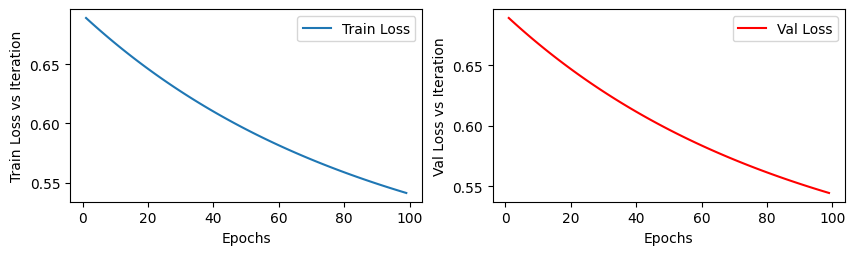

In [17]:
plt.figure(figsize=(10,2.5))

plt.subplot(1,2,1)
plt.plot(epochs, model_mm.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_mm.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

# Part c

Metrics of min-max scaled data

In [18]:
y_val_pred_mm = model_mm.predict(X_val_mm)
# print(y_val_pred_mm)

conf_matrix = confusion_matrix(y_val, y_val_pred_mm)
precision = precision_score(y_val, y_val_pred_mm)
recall = recall_score(y_val, y_val_pred_mm)
f1 = f1_score(y_val, y_val_pred_mm)
roc_auc = roc_auc_score(y_val, model_mm.sigmoid(np.dot(X_val_mm, model_mm.weights) + model_mm.bias))

# Print the results
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Confusion Matrix:
[[538   0]
 [ 98   0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.31044685532205446


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part d

Full Batch Gradient Descent

In [19]:
model_fgd = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=None)
model_fgd.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

model_fgd_test = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=None, pred_type = "test")
model_fgd_test.fit(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch: 0, Train Loss: 0.6918, Train Accuracy: 0.5415, Val Loss: 0.6919, Val Accuracy: 0.5456
Epoch: 10, Train Loss: 0.6776, Train Accuracy: 0.7761, Val Loss: 0.6769, Val Accuracy: 0.7893
Epoch: 20, Train Loss: 0.6644, Train Accuracy: 0.8075, Val Loss: 0.6629, Val Accuracy: 0.8208
Epoch: 30, Train Loss: 0.6519, Train Accuracy: 0.8163, Val Loss: 0.6497, Val Accuracy: 0.8302
Epoch: 40, Train Loss: 0.6402, Train Accuracy: 0.8220, Val Loss: 0.6373, Val Accuracy: 0.8365
Epoch: 50, Train Loss: 0.6291, Train Accuracy: 0.8237, Val Loss: 0.6258, Val Accuracy: 0.8349
Epoch: 60, Train Loss: 0.6187, Train Accuracy: 0.8274, Val Loss: 0.6149, Val Accuracy: 0.8365
Epoch: 70, Train Loss: 0.6088, Train Accuracy: 0.8287, Val Loss: 0.6046, Val Accuracy: 0.8349
Epoch: 80, Train Loss: 0.5996, Train Accuracy: 0.8334, Val Loss: 0.5949, Val Accuracy: 0.8396
Epoch: 90, Train Loss: 0.5908, Train Accuracy: 0.8358, Val Loss: 0.5858, Val Accuracy: 0.8428


Epoch: 0, Train Loss: 0.6933, Train Accuracy: 0.5128, Test 

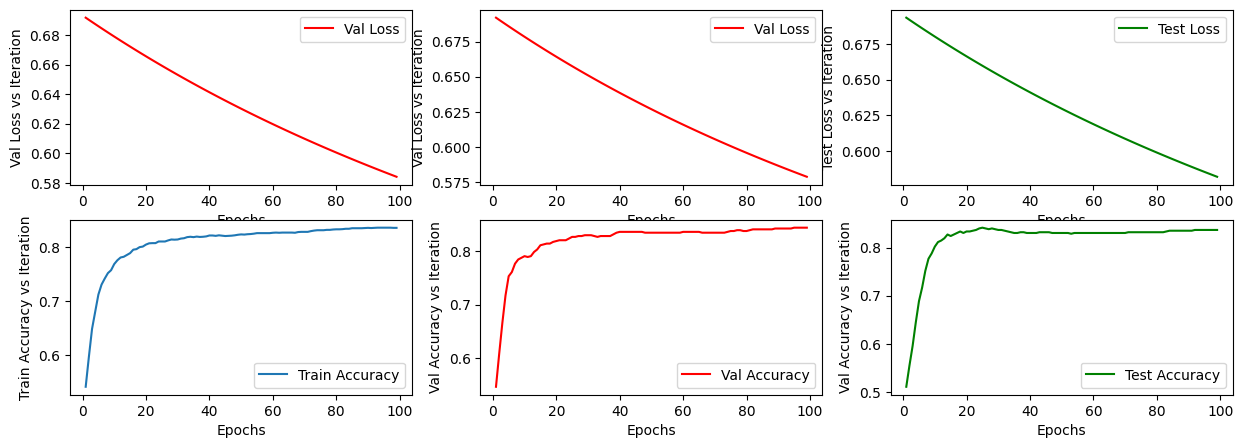

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.plot(epochs, model_fgd.train_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()


plt.subplot(2,3,2)
plt.plot(epochs, model_fgd.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, model_fgd_test.val_loss_list, label = 'Test Loss', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs, model_fgd.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs, model_fgd.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs, model_fgd_test.val_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



Stochastic Gradient Descent

In [21]:
model_sgd = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=1)
model_sgd.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

model_sgd_test = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=1, pred_type = "test")
model_sgd_test.fit(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch: 0, Train Loss: 0.6894, Train Accuracy: 0.5843, Val Loss: 0.6887, Val Accuracy: 0.5975
Epoch: 10, Train Loss: 0.6793, Train Accuracy: 0.6686, Val Loss: 0.6783, Val Accuracy: 0.6667
Epoch: 20, Train Loss: 0.6666, Train Accuracy: 0.7431, Val Loss: 0.6649, Val Accuracy: 0.7563
Epoch: 30, Train Loss: 0.6630, Train Accuracy: 0.7937, Val Loss: 0.6613, Val Accuracy: 0.8145
Epoch: 40, Train Loss: 0.6513, Train Accuracy: 0.7805, Val Loss: 0.6490, Val Accuracy: 0.7877
Epoch: 50, Train Loss: 0.6471, Train Accuracy: 0.8173, Val Loss: 0.6465, Val Accuracy: 0.8223
Epoch: 60, Train Loss: 0.6345, Train Accuracy: 0.8200, Val Loss: 0.6322, Val Accuracy: 0.8318
Epoch: 70, Train Loss: 0.6277, Train Accuracy: 0.8402, Val Loss: 0.6264, Val Accuracy: 0.8412
Epoch: 80, Train Loss: 0.6245, Train Accuracy: 0.8243, Val Loss: 0.6242, Val Accuracy: 0.8129
Epoch: 90, Train Loss: 0.6123, Train Accuracy: 0.8399, Val Loss: 0.6103, Val Accuracy: 0.8459


Epoch: 0, Train Loss: 0.6960, Train Accuracy: 0.4265, Test 

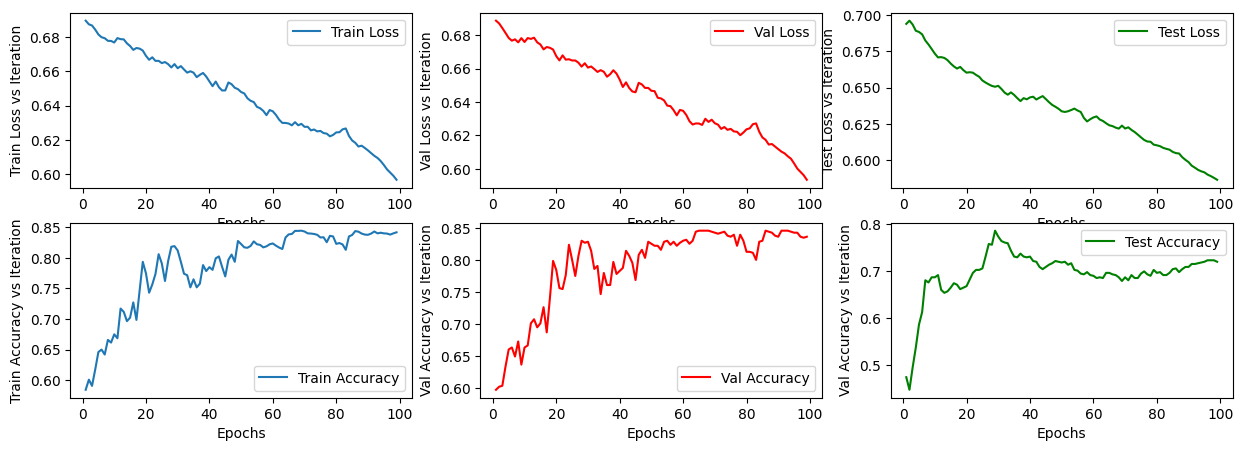

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.plot(epochs, model_sgd.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs, model_sgd.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, model_sgd_test.val_loss_list, label = 'Test Loss', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs, model_sgd.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs, model_sgd.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs, model_sgd_test.val_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



Mini-Batch

In [23]:
print("----BATCH SIZE = 16----\n")

model_mb_16 = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=16)
model_mb_16.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

model_mb_test_16 = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=16, pred_type = "test")
model_mb_test_16.fit(X_train_scaled, y_train, X_test_scaled, y_test)


print("\n----BATCH SIZE = 4----\n")

model_mb_4 = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=4)
model_mb_4.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

model_mb_test_4 = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=4, pred_type = "test")
model_mb_test_4.fit(X_train_scaled, y_train, X_test_scaled, y_test)

----BATCH SIZE = 16----

Epoch: 0, Train Loss: 0.6924, Train Accuracy: 0.5209, Val Loss: 0.6917, Val Accuracy: 0.5393
Epoch: 10, Train Loss: 0.6804, Train Accuracy: 0.7370, Val Loss: 0.6796, Val Accuracy: 0.7358
Epoch: 20, Train Loss: 0.6666, Train Accuracy: 0.8041, Val Loss: 0.6646, Val Accuracy: 0.8050
Epoch: 30, Train Loss: 0.6543, Train Accuracy: 0.8102, Val Loss: 0.6521, Val Accuracy: 0.8145
Epoch: 40, Train Loss: 0.6416, Train Accuracy: 0.8311, Val Loss: 0.6383, Val Accuracy: 0.8428
Epoch: 50, Train Loss: 0.6302, Train Accuracy: 0.8291, Val Loss: 0.6275, Val Accuracy: 0.8365
Epoch: 60, Train Loss: 0.6193, Train Accuracy: 0.8328, Val Loss: 0.6161, Val Accuracy: 0.8349
Epoch: 70, Train Loss: 0.6083, Train Accuracy: 0.8378, Val Loss: 0.6051, Val Accuracy: 0.8396
Epoch: 80, Train Loss: 0.6005, Train Accuracy: 0.8311, Val Loss: 0.5967, Val Accuracy: 0.8349
Epoch: 90, Train Loss: 0.5912, Train Accuracy: 0.8284, Val Loss: 0.5874, Val Accuracy: 0.8302


Epoch: 0, Train Loss: 0.6939, Trai

Batch Size 16 Plots


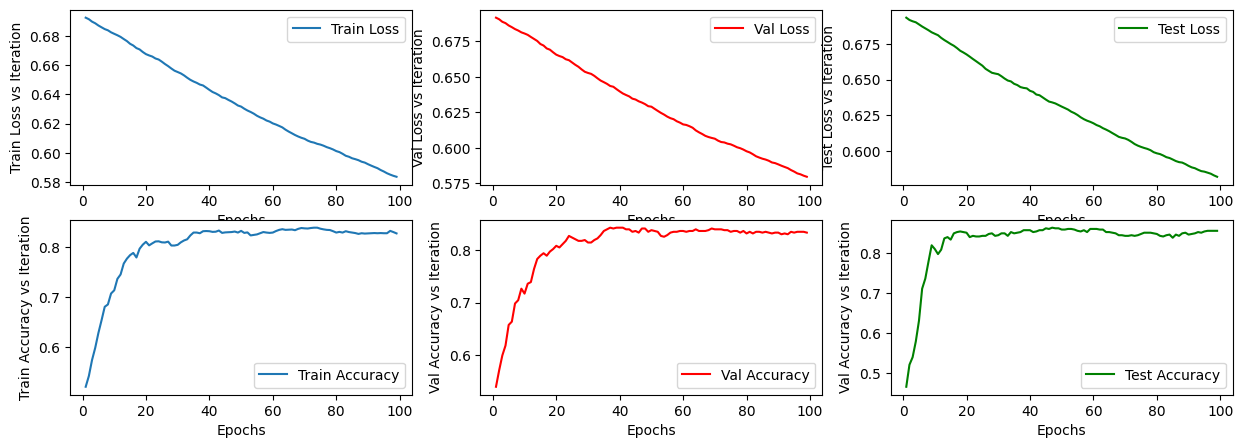

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.plot(epochs, model_mb_16.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs, model_mb_16.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, model_mb_test_16.val_loss_list, label = 'Test Loss', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs, model_mb_16.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs, model_mb_16.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs, model_mb_test_16.val_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



Batch Size 4 Plots


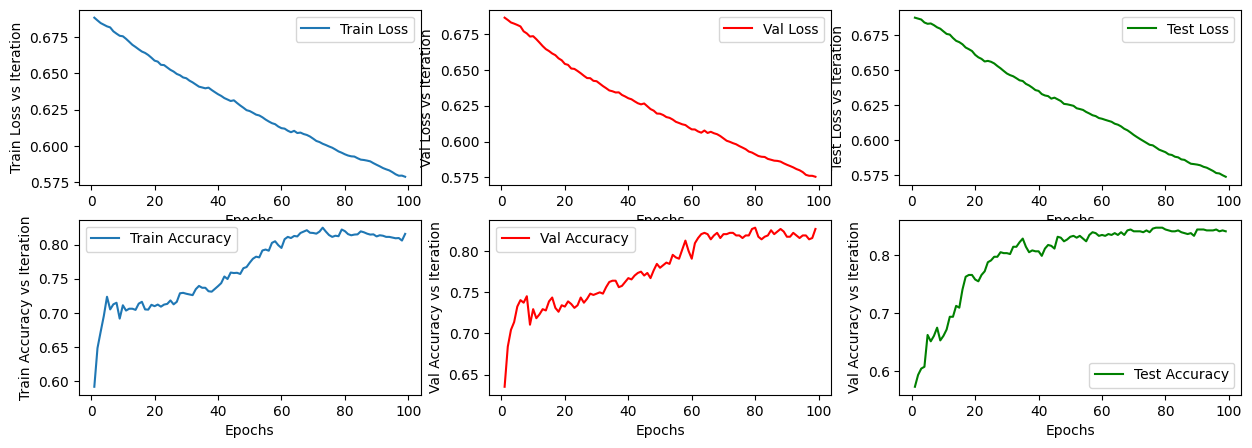

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.plot(epochs, model_mb_4.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs, model_mb_4.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, model_mb_test_4.val_loss_list, label = 'Test Loss', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs, model_mb_4.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs, model_mb_4.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs, model_mb_test_4.val_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



# Part e

In [26]:
#Function to apply k fold 
def k_fold_cross_validation_scratch(X_train, y_train, X_val, y_val, k=5):
    X = np.concatenate((X_train, X_val))
    y = np.concatenate((y_train, y_val))

    # Shuffling the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]

    # Spliting the data into k folds
    fold_size = len(X) // k
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for fold in range(k):
        # Validation dold
        start_val_idx = fold * fold_size
        end_val_idx = start_val_idx + fold_size if fold != k - 1 else len(X)

        X_val_fold = X[start_val_idx:end_val_idx]
        y_val_fold = y[start_val_idx:end_val_idx]

        # Generating training fold (all data except the validation fold)
        X_train_fold = np.concatenate((X[:start_val_idx], X[end_val_idx:]))
        y_train_fold = np.concatenate((y[:start_val_idx], y[end_val_idx:]))

        # Training
        model = MyLogisticRegression(lr=LR, epochs=EPOCHS, batch_size=None)
        model.fit(X_train_fold, y_train_fold, X_val_fold, y_val_fold)

        y_pred = model.predict(X_val_fold)

        # Calculate metrics
        accuracies.append(accuracy_score(y_val_fold, y_pred))
        precisions.append(precision_score(y_val_fold, y_pred))
        recalls.append(recall_score(y_val_fold, y_pred))
        f1_scores.append(f1_score(y_val_fold, y_pred))

        print(f"\n----Fold {fold + 1} completed----\n")

    return accuracies, precisions, recalls, f1_scores

In [27]:
# Cross-validation
accuracies, precisions, recalls, f1_scores = k_fold_cross_validation_scratch(X_train_scaled, y_train, X_val_scaled, y_val)

metrics = {
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
}

for metric_name, metric_values in metrics.items():
    avg = np.mean(metric_values)
    std = np.std(metric_values)
    print(f"{metric_name}: Avg = {avg:.4f}, Std = {std:.4f}")

# Train final model on all training and validation data
X_train_val = np.concatenate((X_train_scaled, X_val_scaled))
y_train_val = np.concatenate((y_train, y_val))

final_model = MyLogisticRegression(lr=LR, epochs=EPOCHS, batch_size=None, pred_type="test")
final_model.fit(X_train_val, y_train_val, X_test_scaled, y_test)

# Evaluate on test set
y_pred_test = final_model.predict(X_test_scaled)
print("\nFinal Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_test):.4f}")


Epoch: 0, Train Loss: 0.6913, Train Accuracy: 0.5527, Val Loss: 0.6917, Val Accuracy: 0.5389
Epoch: 10, Train Loss: 0.6767, Train Accuracy: 0.7817, Val Loss: 0.6774, Val Accuracy: 0.7819
Epoch: 20, Train Loss: 0.6631, Train Accuracy: 0.8161, Val Loss: 0.6641, Val Accuracy: 0.8153
Epoch: 30, Train Loss: 0.6504, Train Accuracy: 0.8248, Val Loss: 0.6516, Val Accuracy: 0.8125
Epoch: 40, Train Loss: 0.6384, Train Accuracy: 0.8293, Val Loss: 0.6399, Val Accuracy: 0.8139
Epoch: 50, Train Loss: 0.6272, Train Accuracy: 0.8317, Val Loss: 0.6289, Val Accuracy: 0.8125
Epoch: 60, Train Loss: 0.6166, Train Accuracy: 0.8310, Val Loss: 0.6185, Val Accuracy: 0.8139
Epoch: 70, Train Loss: 0.6066, Train Accuracy: 0.8310, Val Loss: 0.6087, Val Accuracy: 0.8139
Epoch: 80, Train Loss: 0.5973, Train Accuracy: 0.8321, Val Loss: 0.5995, Val Accuracy: 0.8139
Epoch: 90, Train Loss: 0.5884, Train Accuracy: 0.8324, Val Loss: 0.5908, Val Accuracy: 0.8125

----Fold 1 completed----

Epoch: 0, Train Loss: 0.6940, Trai

# Part f

In [28]:
#Use 0.5 or more Learning Rate here if the model keeps improving on 0.1 and early stopping isn't deploying
# FGD and Batch Size = 16 have similar performance and one model beats the other depending upon the split hence, I have decided to continue with FGD

early_stopping_model =  MyLogisticRegression(lr = 0.5, epochs = EPOCHS, batch_size=None, early_stopping=True)
early_stopping_model.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

early_stopping_model_test= MyLogisticRegression(lr = 0.5, epochs = EPOCHS, batch_size=None, pred_type = "test", early_stopping=True)
early_stopping_model_test.fit(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch: 0, Train Loss: 0.6246, Train Accuracy: 0.8065, Val Loss: 0.6205, Val Accuracy: 0.8176
Epoch: 10, Train Loss: 0.4244, Train Accuracy: 0.8533, Val Loss: 0.4196, Val Accuracy: 0.8443
Epoch: 20, Train Loss: 0.3948, Train Accuracy: 0.8517, Val Loss: 0.3926, Val Accuracy: 0.8538
Epoch: 30, Train Loss: 0.3869, Train Accuracy: 0.8510, Val Loss: 0.3863, Val Accuracy: 0.8538
Epoch: 40, Train Loss: 0.3840, Train Accuracy: 0.8517, Val Loss: 0.3846, Val Accuracy: 0.8538
Epoch: 50, Train Loss: 0.3828, Train Accuracy: 0.8527, Val Loss: 0.3842, Val Accuracy: 0.8538
Early stopping at epoch 57


Epoch: 0, Train Loss: 0.6249, Train Accuracy: 0.8122, Test Loss: 0.6242, Test Accuracy: 0.8255
Epoch: 10, Train Loss: 0.4245, Train Accuracy: 0.8527, Test Loss: 0.4144, Test Accuracy: 0.8585
Epoch: 20, Train Loss: 0.3949, Train Accuracy: 0.8517, Test Loss: 0.3810, Test Accuracy: 0.8648
Epoch: 30, Train Loss: 0.3869, Train Accuracy: 0.8510, Test Loss: 0.3711, Test Accuracy: 0.8648
Epoch: 40, Train Loss: 0.

Graphs without early stopping are above, and with early stopping are below

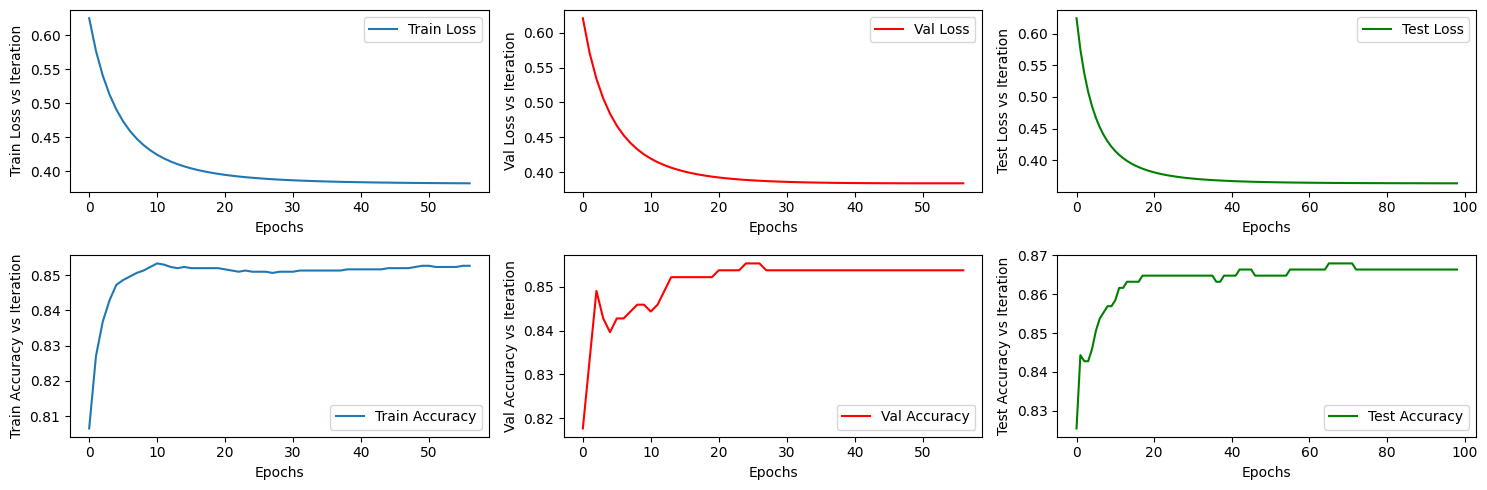

In [29]:
import numpy as np

plt.figure(figsize=(15,5))

# Create x-values corresponding to the number of epochs
epochs_range = np.arange(len(early_stopping_model.train_loss_list))

plt.subplot(2,3,1)
plt.plot(epochs_range, early_stopping_model.train_loss_list, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs_range, early_stopping_model.val_loss_list, label='Val Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

# For the test model, the length of the val_loss_list may differ, so use the appropriate range
epochs_range_test = np.arange(len(early_stopping_model_test.val_loss_list))
plt.subplot(2,3,3)
plt.plot(epochs_range_test, early_stopping_model_test.val_loss_list, label='Test Loss', color='green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs_range, early_stopping_model.train_acc, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs_range, early_stopping_model.val_acc, label='Val Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs_range_test, early_stopping_model_test.val_acc, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy vs Iteration')
plt.legend()

plt.tight_layout()
plt.show()

